In [2]:
import pandas as pd

# Carica il dataset
df = pd.read_csv('C:\\Users\\CRAIA-AREA EDUCATORI\\Documents\\Università\\Sistemi intelligenti per internet\\beer_data\\beer_reviews.csv')

# Raggruppa per utente e birra, calcolando la media dei voti
df_avg = df.groupby(['review_profilename', 'beer_beerid']).agg({'review_overall': 'mean'}).reset_index()

# Filtra per includere solo utenti con almeno 50 recensioni
user_counts = df_avg['review_profilename'].value_counts()
popular_users = user_counts[user_counts >= 50].index
df_filtered = df_avg[df_avg['review_profilename'].isin(popular_users)]

# Filtra per includere solo birre con almeno 100 recensioni
beer_counts = df_avg['beer_beerid'].value_counts()
popular_beers = beer_counts[beer_counts >= 100].index
df_filtered = df_filtered[df_filtered['beer_beerid'].isin(popular_beers)]

# Creazione della matrice utente-birra senza duplicati
user_beer_matrix = df_filtered.pivot(index='review_profilename', columns='beer_beerid', values='review_overall').fillna(0)


In [3]:
pip install scikit-learn

In [4]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Calcolo della similarità tra utenti
user_similarity = cosine_similarity(user_beer_matrix)


In [5]:
pip install networkX

Note: you may need to restart the kernel to use updated packages.


In [6]:
import networkx as nx

# Crea il grafo
G = nx.Graph()

# Aggiungi nodi e archi in base alla similarità
for i, user in enumerate(user_beer_matrix.index):
    for j in range(i + 1, len(user_beer_matrix.index)):
        if user_similarity[i][j] > 0.5:  # threshold di similarità
            G.add_edge(user, user_beer_matrix.index[j], weight=user_similarity[i][j])

In [7]:
centrality = nx.betweenness_centrality(G)
influential_users = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]

# Visualizza i top utenti influenti
print(influential_users)


[('rastaman', 0.12602514775544368), ('Gusler', 0.11004593687406172), ('CAMRAhardliner', 0.08901337366292343), ('TheLongBeachBum', 0.06330758633442697), ('Thorpe429', 0.05162523630820692), ('Halcyondays', 0.046337321625834246), ('mikesgroove', 0.041640306263458715), ('BuckeyeNation', 0.03819231914887232), ('egajdzis', 0.03377718398279188), ('TerryW', 0.033039649704288354)]


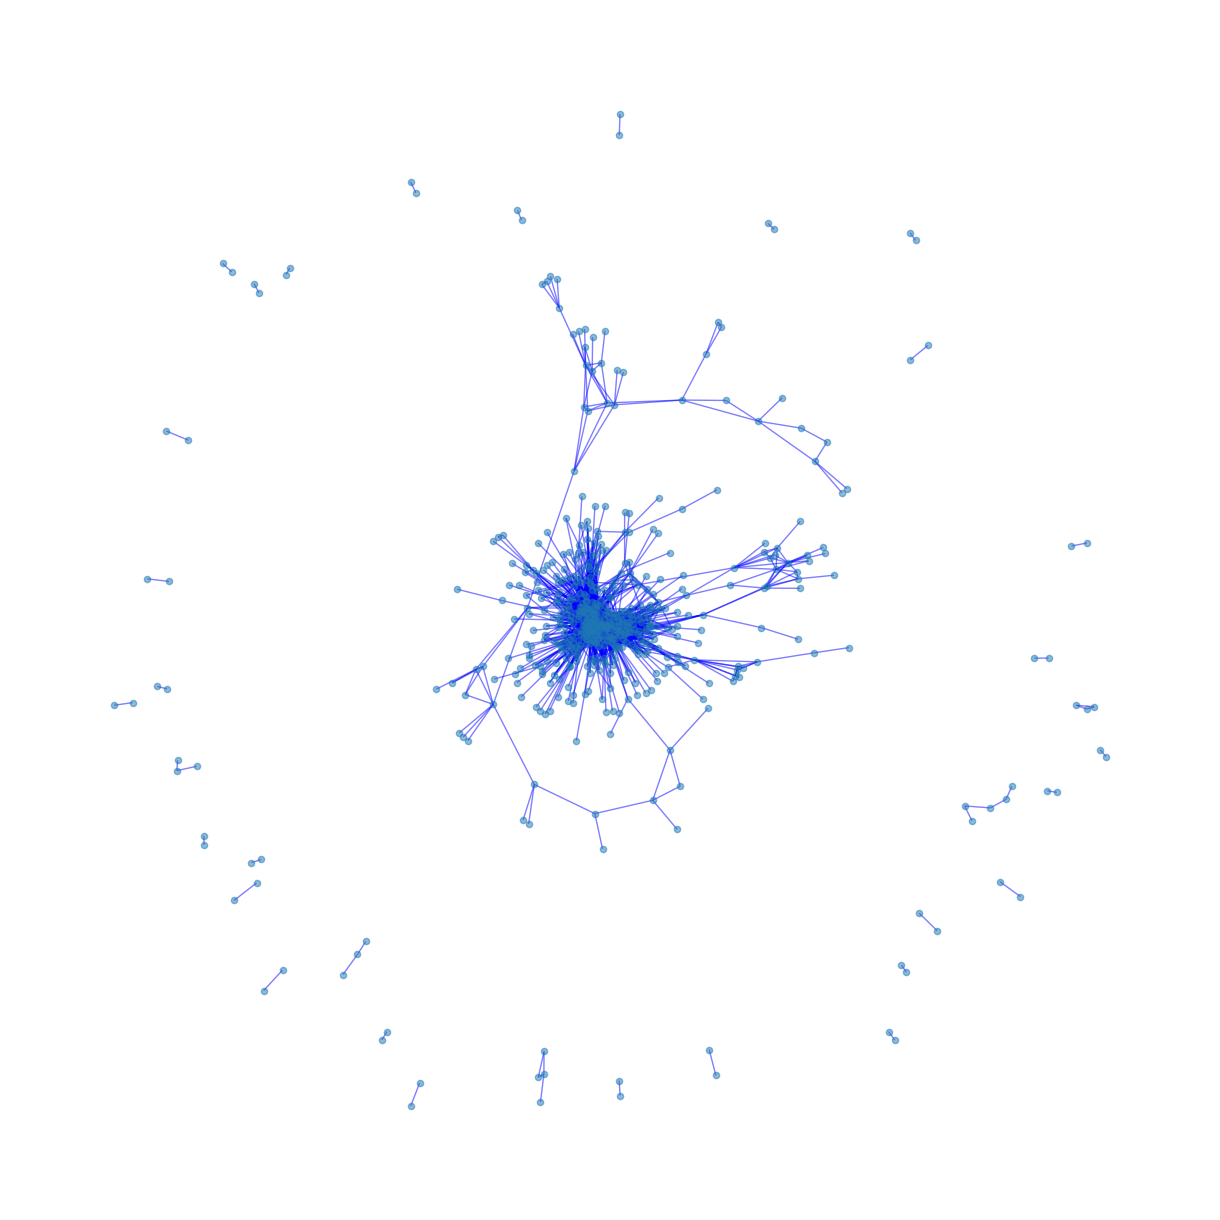

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=False, node_size=20, edge_color='b', alpha=0.5)
plt.show()


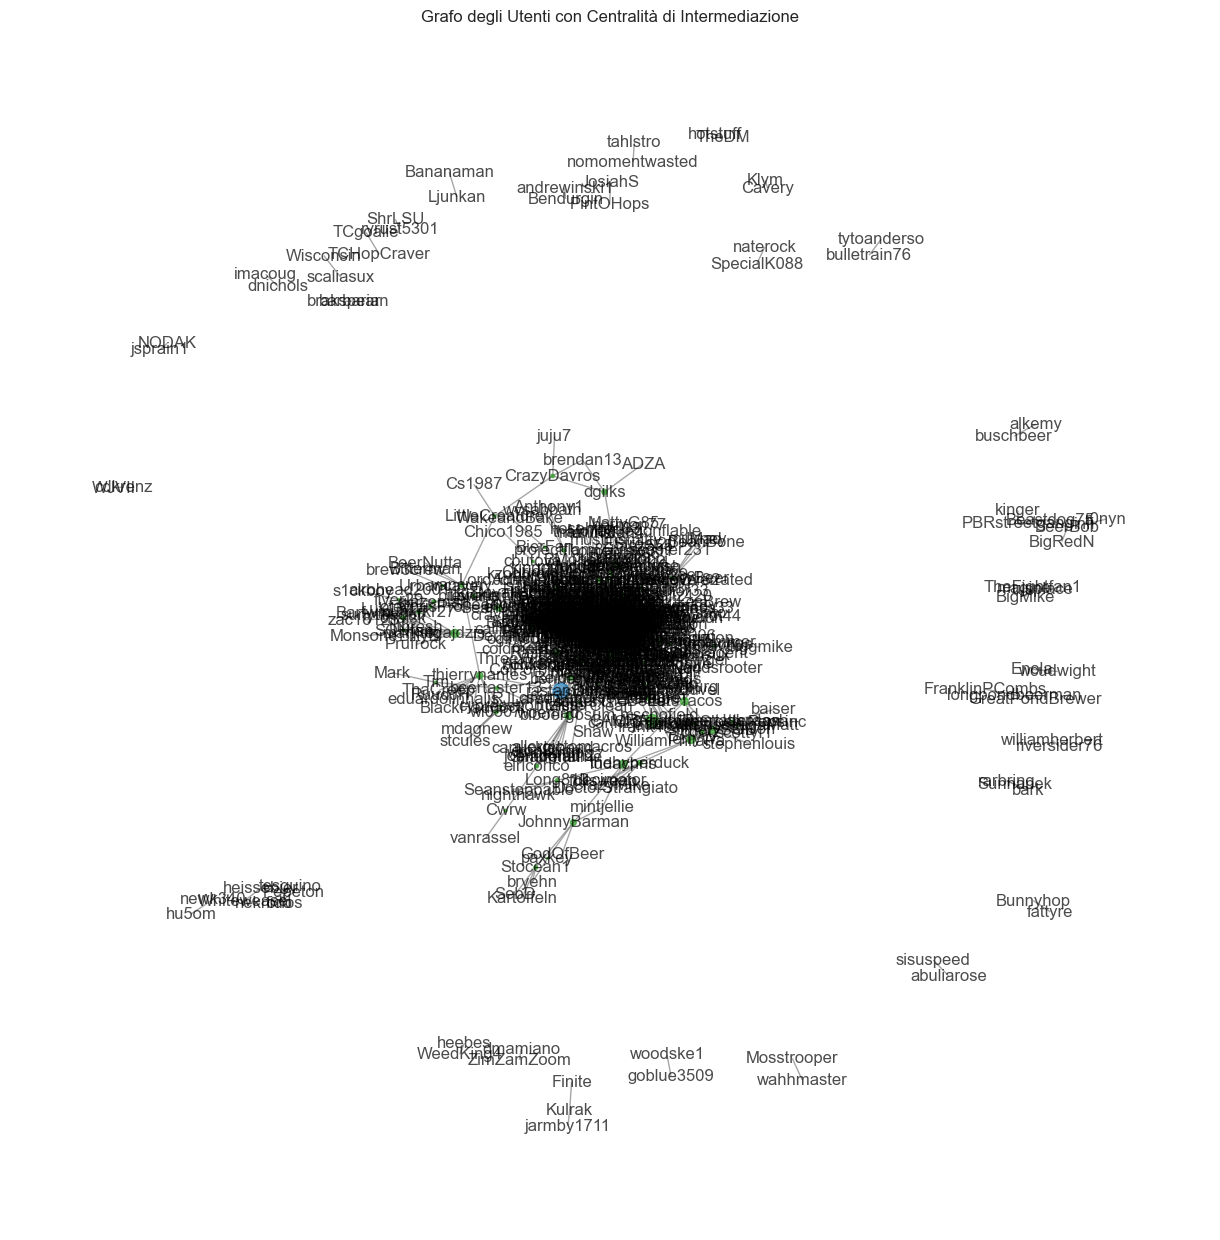

In [9]:
import matplotlib.pyplot as plt

# Calcola le dimensioni dei nodi in base alla centralità
node_sizes = [1000 * centrality[user] for user in G.nodes()]

# Imposta i colori dei nodi (ad esempio, usando un colormap)
colors = ['#1f78b4' if centrality[user] > 0.1 else '#33a02c' for user in G.nodes()]

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)  # Posizionamento dei nodi
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=colors, alpha=0.7, edge_color='gray')

plt.title('Grafo degli Utenti con Centralità di Intermediazione')
plt.show()


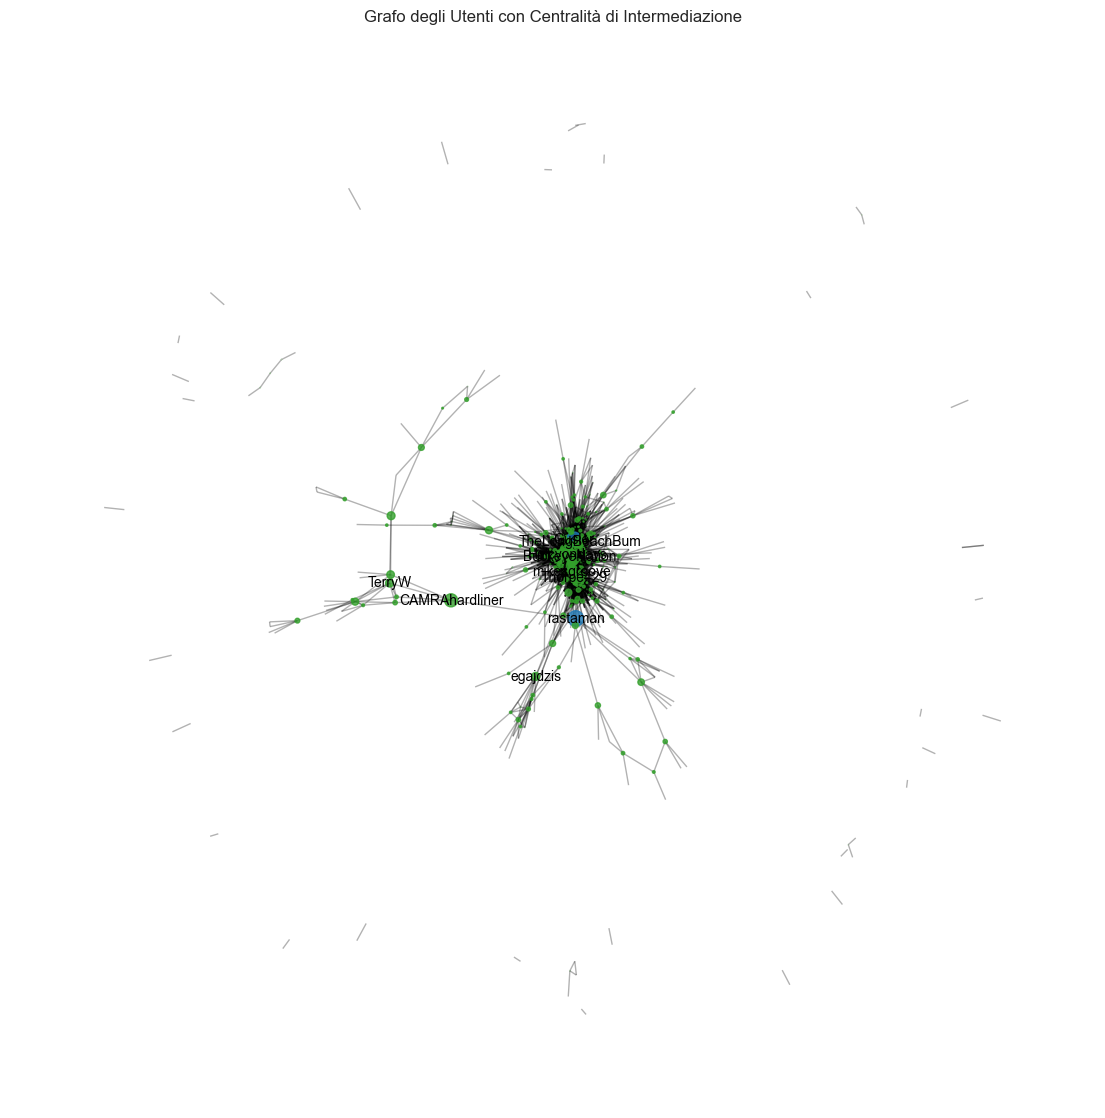

In [10]:
plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G)

# Disegna i nodi e gli archi
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, alpha=0.3)  # Archi più trasparenti

# Aggiungi etichette solo ai nodi più influenti
labels = {user: user for user, score in sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

plt.title('Grafo degli Utenti con Centralità di Intermediazione')
plt.axis('off')  # Nascondi gli assi
plt.show()


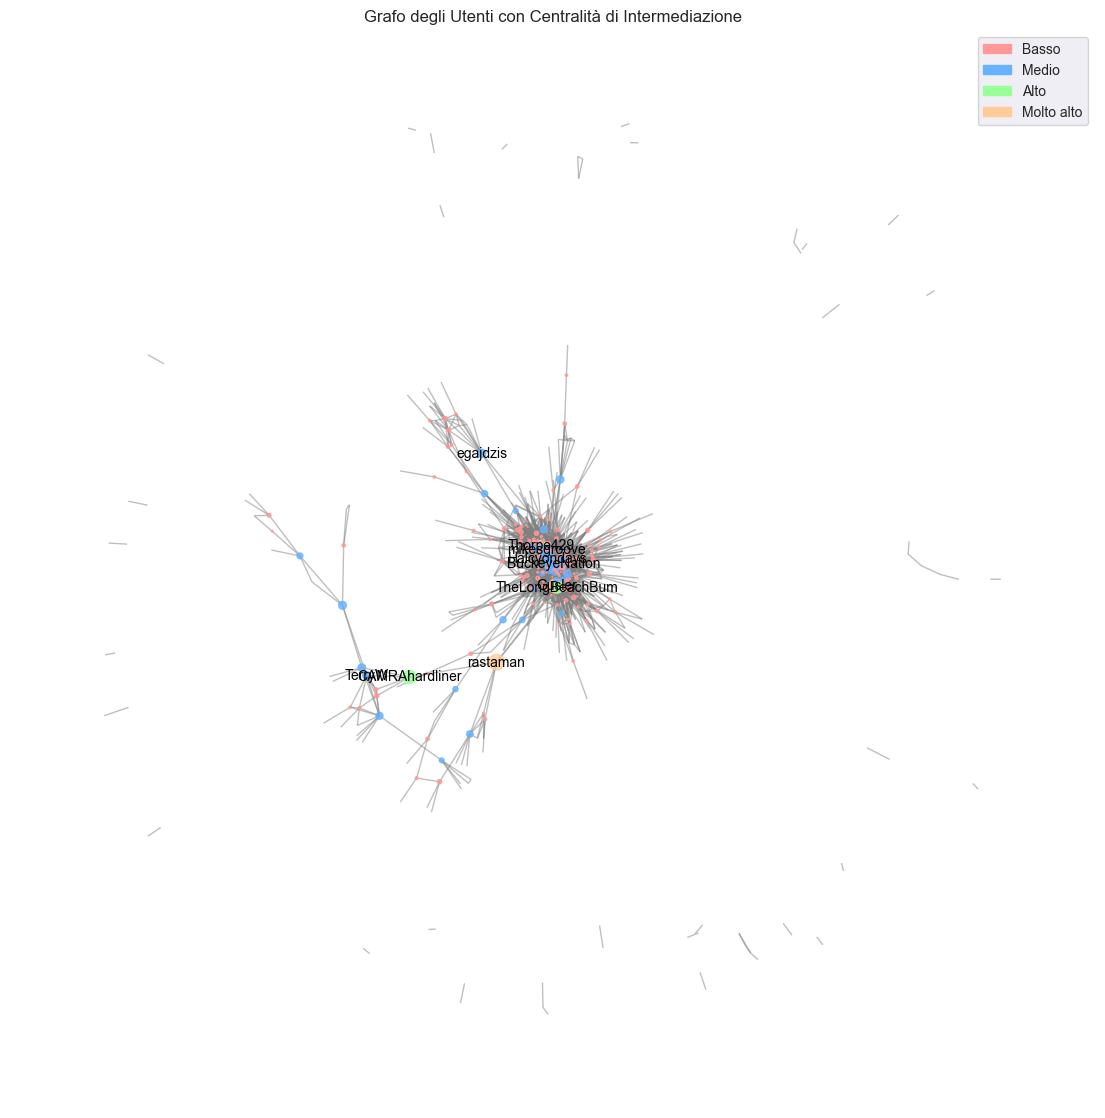

In [11]:
import matplotlib.pyplot as plt

# Classificazione dei nodi in base alla centralità
thresholds = [0, 0.01, 0.05, 0.1]  # Soglie di centralità
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']  # Colori per le categorie

# Assegna un colore ai nodi in base alla centralità
node_colors = []
for user in G.nodes():
    centrality_score = centrality[user]
    if centrality_score <= thresholds[1]:
        node_colors.append(colors[0])  # Basso
    elif centrality_score <= thresholds[2]:
        node_colors.append(colors[1])  # Medio
    elif centrality_score <= thresholds[3]:
        node_colors.append(colors[2])  # Alto
    else:
        node_colors.append(colors[3])  # Molto alto

plt.figure(figsize=(14, 14))
pos = nx.spring_layout(G)

# Disegna i nodi e gli archi
nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5)

# Aggiungi etichette solo ai nodi più influenti
labels = {user: user for user, score in sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:10]}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10)

# Aggiungere la leggenda
import matplotlib.patches as mpatches

legend_labels = ['Basso', 'Medio', 'Alto', 'Molto alto']
patches = [mpatches.Patch(color=colors[i], label=legend_labels[i]) for i in range(len(legend_labels))]
plt.legend(handles=patches, loc='upper right')

plt.title('Grafo degli Utenti con Centralità di Intermediazione')
plt.axis('off')  # Nascondi gli assi
plt.show()


In [12]:
pip install plotly

In [13]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [15]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
import numpy as np


# Creazione della matrice utente-birra
user_beer_matrix = df.pivot(index='review_profilename', columns='beer_beerid', values='review_overall').fillna(0)

# Calcolo della similarità tra utenti
user_similarity = cosine_similarity(user_beer_matrix)

# Creazione del grafo
G = nx.Graph()

for i, user in enumerate(user_beer_matrix.index):
    for j in range(i + 1, len(user_beer_matrix.index)):
        if user_similarity[i][j] > 0.5:  # Soglia di similarità
            G.add_edge(user, user_beer_matrix.index[j], weight=user_similarity[i][j])

# Calcola la centralità
centrality = nx.betweenness_centrality(G)

# Assegna colori in base alla centralità
thresholds = [0, 0.01, 0.05, 0.1]
colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']
node_colors = []

for user in G.nodes():
    centrality_score = centrality[user]
    if centrality_score <= thresholds[1]:
        node_colors.append(colors[0])  # Basso
    elif centrality_score <= thresholds[2]:
        node_colors.append(colors[1])  # Medio
    elif centrality_score <= thresholds[3]:
        node_colors.append(colors[2])  # Alto
    else:
        node_colors.append(colors[3])  # Molto alto

# Estrazione delle posizioni dei nodi
pos = nx.spring_layout(G)
x_nodes = [pos[node][0] for node in G.nodes()]
y_nodes = [pos[node][1] for node in G.nodes()]

# Creazione del grafo interattivo con Plotly
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)  # Per interrompere la linea
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)  # Per interrompere la linea

# Creazione delle tracce per i nodi e gli archi
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='gray'),
    hoverinfo='none',
    mode='lines'
)

node_trace = go.Scatter(
    x=x_nodes, y=y_nodes,
    mode='markers+text',
    text=[f"{user}: {centrality[user]:.4f}" for user in G.nodes()],
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale=colors,
        color=[colors.index(node_color) for node_color in node_colors],
        size=10,
        colorbar=dict(thickness=15, title='Centralità'),
        line_width=2
    )
)

# Layout finale
fig = go.Figure(data=[edge_trace, node_trace],
                layout=go.Layout(
                    title='Grafo degli Utenti con Centralità di Intermediazione',
                    titlefont_size=16,
                    showlegend=False,
                    hovermode='closest',
                    margin=dict(b=0,l=0,r=0,t=40),
                    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.show()

C:\Users\CRAIA-AREA EDUCATORI\AppData\Local\Temp\ipykernel_3604\456351413.py:8: PerformanceWarning: The following operation may generate 2205378285 cells in the resulting pandas object.
  user_beer_matrix = df.pivot(index='review_profilename', columns='beer_beerid', values='review_overall').fillna(0)


ValueError: Index contains duplicate entries, cannot reshape